Hello, in this tutorial we are going to extract different features from given input fingerprint image for matching it with other images.  

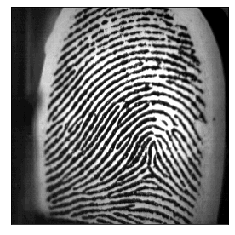

(256, 256, 3)


In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('./data/person1/1_1.bmp') 

#Display image 

plt.imshow(img1)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

# Image shape (rows,cols,channels)
print(img1.shape)

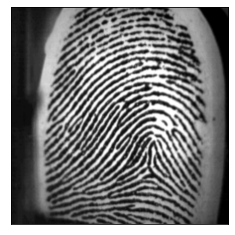

(256, 256)


In [12]:
### RGB to Gray scale conversion

gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plt.imshow(gray1, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()

print(gray1.shape)

In [2]:
# SIFT: keypoints & descriptors

sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)

plt.imshow(img_1)
plt.xticks([]), plt.yticks([]) 
plt.show()

NameError: name 'gray1' is not defined

[<KeyPoint 0x7fa748e2ab70>, <KeyPoint 0x7fa747145390>, <KeyPoint 0x7fa747145210>, <KeyPoint 0x7fa7471452d0>, <KeyPoint 0x7fa747145180>, <KeyPoint 0x7fa7471454b0>, <KeyPoint 0x7fa747145480>, <KeyPoint 0x7fa7471453f0>, <KeyPoint 0x7fa7471453c0>, <KeyPoint 0x7fa747145450>, <KeyPoint 0x7fa747145510>, <KeyPoint 0x7fa747145360>, <KeyPoint 0x7fa747145330>, <KeyPoint 0x7fa747145240>, <KeyPoint 0x7fa747145300>, <KeyPoint 0x7fa747145540>, <KeyPoint 0x7fa747145420>, <KeyPoint 0x7fa7471454e0>, <KeyPoint 0x7fa7471455d0>, <KeyPoint 0x7fa747145570>, <KeyPoint 0x7fa747145660>, <KeyPoint 0x7fa747145630>, <KeyPoint 0x7fa7471455a0>, <KeyPoint 0x7fa747145600>, <KeyPoint 0x7fa747145690>, <KeyPoint 0x7fa7471456c0>, <KeyPoint 0x7fa7471456f0>, <KeyPoint 0x7fa747145720>, <KeyPoint 0x7fa747145750>, <KeyPoint 0x7fa747145780>, <KeyPoint 0x7fa7471457b0>, <KeyPoint 0x7fa7471457e0>, <KeyPoint 0x7fa747145810>, <KeyPoint 0x7fa747145840>, <KeyPoint 0x7fa747145870>, <KeyPoint 0x7fa7471458a0>, <KeyPoint 0x7fa7471458d0>, 

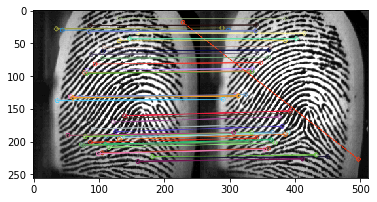

In [6]:
## Image feature matching using SIFT

# read images
img1 = cv2.imread('./data/person1/1_1.bmp')  
img2 = cv2.imread('./data/person1/1_4.bmp') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
print(keypoints_1)
print(descriptors_1.shape)
print(descriptors_2.shape)
print(len(keypoints_1), len(keypoints_2))

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3)
plt.show()

1455 1455 645


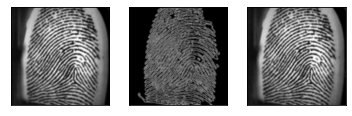

In [66]:
### Other image processing features: 
###    1) Morphological operations: Erosion, dilation, opening, closing
###    2) Edge detection
###    3) Corner detection


import numpy as np

img1 = cv2.imread('./data/person1/1_1.bmp')  
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel)
edge = cv2.Canny(img1,0,700)

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(opening,None)
keypoints_3, descriptors_3 = sift.detectAndCompute(edge,None)

print(len(keypoints_1), len(keypoints_2), len(keypoints_3))


plt.figure(1)
plt.subplot(131)
plt.imshow(img1, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(edge, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(closing, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

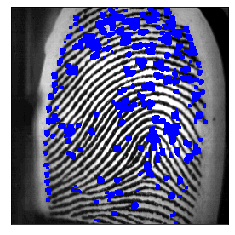

In [64]:
### Harris corner detection

import cv2
import numpy as np

filename = './data/person1/1_1.bmp'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,5,11,0.1)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()